## **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import keras

In [ ]:
# print the installed version of TensorFlow
print("TensorFlow Version:", tf.__version__)

# print the installed version of Keras
print("Keras Version:", keras.__version__)

Versi TensorFlow: 2.17.1
Versi Keras: 3.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Explore Dataset**

In [ ]:
# path to the dataset directory
base_dir = '/content/drive/MyDrive/split 2 fix'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')


In [ ]:
# count images in the directory
def count_images_in_directory(directory):
    total_images = 0
    for _, _, filenames in os.walk(directory):
        total_images += len(filenames)
    return total_images

dataset_count = count_images_in_directory(base_dir)
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)

print(f"Total dataset: {dataset_count} images")
print(f"Training data: {train_count} images")
print(f"Validation data: {val_count} images")


Total dataset: 700 images
Training data: 560 images
Validation data: 140 images


In [ ]:
# count images per label in the directory
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            total_images_in_label = len(os.listdir(label_path))
            label_counts[label] = total_images_in_label
    return label_counts

train_label_counts = count_images_per_label(train_dir)
val_label_counts = count_images_per_label(val_dir)

print(f"Total of labels in training data: {len(train_label_counts)}")
for label, count in train_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in validation data: {len(val_label_counts)}")
for label, count in val_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

Total of labels in training data: 7
Label: scabies, Count: 80 images
Label: ringworm, Count: 80 images
Label: nasal_discharge, Count: 80 images
Label: keratosis, Count: 80 images
Label: flea_allergy, Count: 80 images
Label: eyelid_lump, Count: 80 images
Label: ear_mites, Count: 80 images

Total of labels in validation data: 7
Label: scabies, Count: 20 images
Label: ringworm, Count: 20 images
Label: nasal_discharge, Count: 20 images
Label: keratosis, Count: 20 images
Label: flea_allergy, Count: 20 images
Label: eyelid_lump, Count: 20 images
Label: ear_mites, Count: 20 images


In [ ]:
# list files in training data
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/split 2 fix/train/scabies/scabies_101_png.rf.636c55c38b22962789fc2828e2752604 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/mange-2-_jpg.rf.3970e387a53a9d01bc2ed452f102d921 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/Image_14_jpeg.rf.dd99f213a06552e7b0662d261fb3cc89 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/Image_97_jpg.rf.37446cc2ed3a425efbea844129bf79c7 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/aug4_jpg.rf.42c22fd741a21b62083344beda8978a8 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/scabies_98_png.rf.4d8b3b4e894281c8404d950a02089552 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/scabies_135_png.rf.8467b8503c1dc133ff4c8a8a290e61d3 (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/aug_0_5721_jpeg.rf.292c89cb8d25849048f54ffae886d96d (1).jpg
/content/drive/MyDrive/split 2 fix/train/scabies/scabies_91_png.rf.fc8465715253bd76665daa6466bb5f06 (1).jpg
/content/drive/MyDrive/split 2 fix/t

In [ ]:
# list files in validation data
for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/split 2 fix/validation/scabies/Image_25_jpg.rf.3bb7dceced83348265c1e25c13287d96 (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/scabies_119_png.rf.45b9868c3b6ef4e7f489eeb2908b9840 (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/Image_16-2-_jpg.rf.5be4e50299435ce39c2a6d3b1c155029 (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/scabies_125_png.rf.5e27037cd8b2b42921dbaaf014ad36a0 (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/Image_27-2-_jpg.rf.f5f8e330a4f7002b57137a43dc02cfef (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/scabies_124_png.rf.b1f2dd2a546359526dc5126dd754c1ff (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/Image_33-3-_jpg.rf.0deb90e5a64c700ec6cf6e43c99705ed (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/aug5_JPG.rf.6665d8da3ed3fa8a1e3ad56d18105ac6 (1).jpg
/content/drive/MyDrive/split 2 fix/validation/scabies/Image_10_jpg.rf.e73bfc37b48886c276c0b85dfe4b

## **Preprocessing Data**

In [ ]:
# batch size and image size
batch_size = 16
img_height = 224
img_width = 224

# define augmentation and normalization parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

# define normalization parameters for validation and testing data
val_datagen = ImageDataGenerator(
    rescale=1.0/255
  )

# load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123
  )

# load validation data
val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )



Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [ ]:
# get the first batch of images and labels
iterator = iter(train_data)
images, labels = next(iterator)

# display the first batch information
print(f"Shape of batch of images: {images.shape}")
print(f"Shape of batch of labels: {labels.shape}")

Shape of batch of images: (16, 224, 224, 3)
Shape of batch of labels: (16, 7)


Training images with labels:


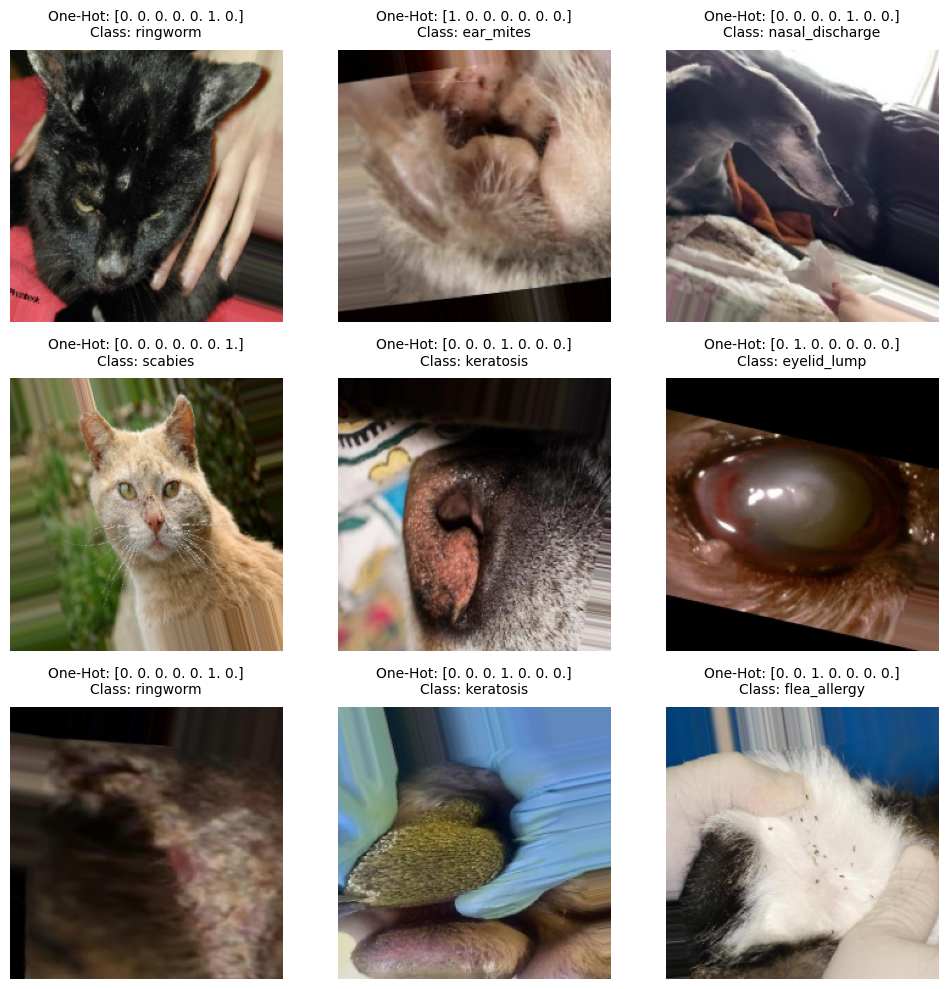


Validation images with labels:


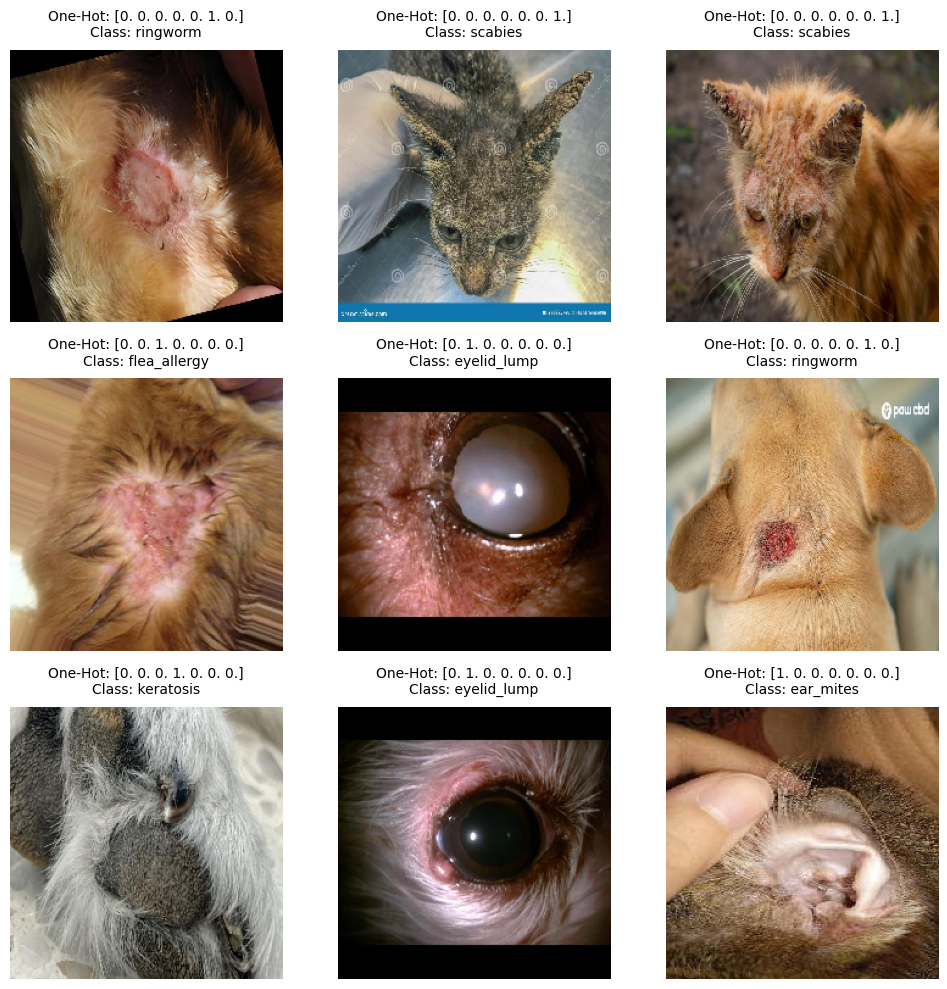

In [ ]:
# display the image along with the label
def display_images_with_labels(data, num_images=9):
    # take the first batch
    images, labels = next(data)

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # display one-hot encoding
        one_hot_label = labels[i]
        # display the class name based on one-hot encoding
        class_index = np.argmax(one_hot_label)
        class_name = list(data.class_indices.keys())[class_index]

        # combine one-hot encoding and class name
        plt.title(f"One-Hot: {one_hot_label}\nClass: {class_name}", fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

print("Training images with labels:")
display_images_with_labels(train_data)

print("\nValidation images with labels:")
display_images_with_labels(val_data)


## **Modeling**

In [ ]:
# load InceptionV3 without fully connected layer
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# freezing most layers and unfreezing the last 30 layers:
for layer in base_model.layers[:-30]:
    layer.trainable = False

# custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# output layer
output = Dense(7, activation='softmax')(x)

# defining the model
model = Model(inputs=base_model.input, outputs=output)

# optimizer and model compilation
optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model summary
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,345,511 (85.24 MB)

 Trainable params: 5,698,119 (21.74 MB)

 Non-trainable params: 16,647,392 (63.50 MB)

In [ ]:
# prepare early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 480s 11s/step - accuracy: 0.1975 - loss: 2.5830 - val_accuracy: 0.3929 - val_loss: 1.5478
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.4255 - loss: 1.6645 - val_accuracy: 0.5786 - val_loss: 1.1709
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5583 - loss: 1.1461 - val_accuracy: 0.6357 - val_loss: 1.0235
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.5936 - loss: 1.1539 - val_accuracy: 0.6714 - val_loss: 0.9350
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6345 - loss: 1.0312 - val_accuracy: 0.6857 - val_loss: 0.8976
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6559 - loss: 0.9633 - val_accuracy: 0.6857 - val_loss: 0.8082
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7018 - loss: 0.8847 - val_accuracy: 0.7286 - val_loss: 0.7267
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7309 - loss: 0.8212 - val_accuracy: 0.7429 - val_

## **Evaluasi Moodel**

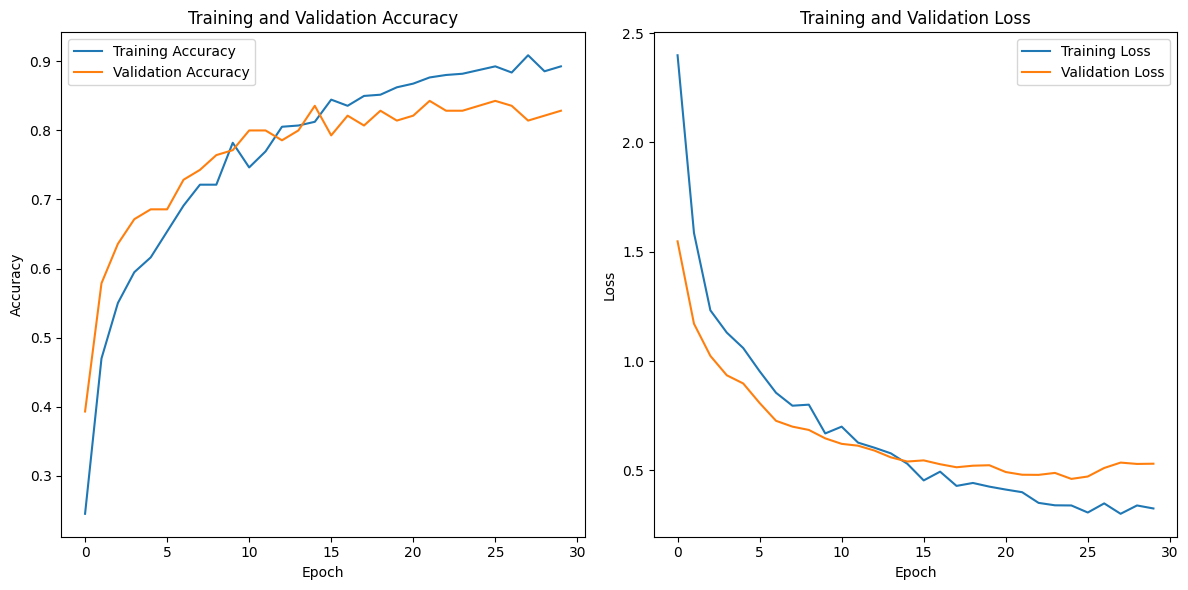

In [ ]:
import matplotlib.pyplot as plt

# plot for training and validation accuracy
plt.figure(figsize=(12, 6))

# training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# display the plot
plt.tight_layout()
plt.show()


## **Testing Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


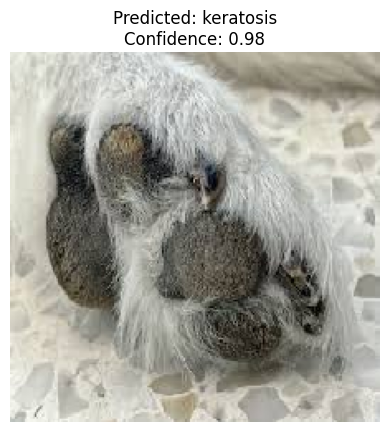

In [ ]:
# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with additional "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# path of the image that want to be tested
test_image_path = '/content/test-keratosis.jpg'

# image prediction with "unknown" detection
test_image, predicted_class, confidence = predict_image_with_unknown(
    model, test_image_path, train_data.class_indices, threshold=0.65

# display image and prediction result
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


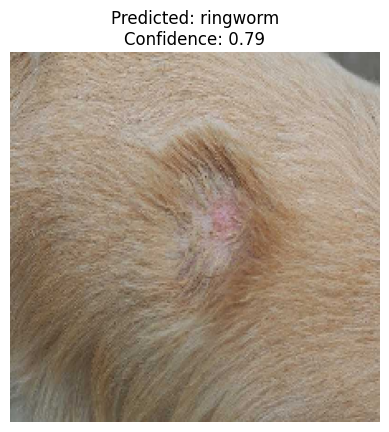

In [ ]:
# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with additional "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# path of the image that want to be tested
test_image_path = '/content/drive/MyDrive/test gambar/img-5_9f114284-52d9-4b15-b0b8-e719cc6641eb.jpg'

# image prediction with "unknown" detection
test_image, predicted_class, confidence = predict_image_with_unknown(
    model, test_image_path, train_data.class_indices, threshold=0.65
)

# display image and prediction result
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


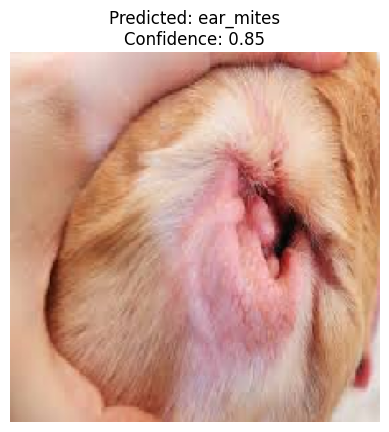

In [ ]:
# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with additional "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# path of the image that want to be tested
test_image_path =  '/content/drive/MyDrive/test gambar/images (8).jpg'
# image prediction with "unknown" detection
test_image, predicted_class, confidence = predict_image_with_unknown(
    model, test_image_path, train_data.class_indices, threshold=0.65
)

# display image and prediction result
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
plt.axis("off")
plt.show()

Upload image for prediction:


Saving fleass.jpg to fleass.jpg
File yang diunggah: fleass.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


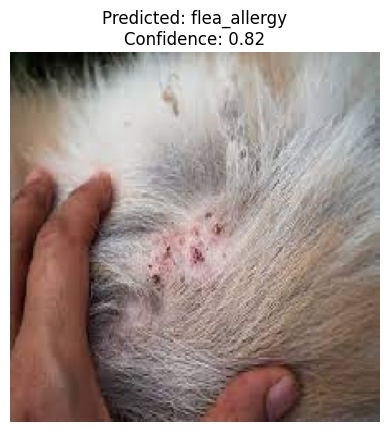

In [ ]:
from google.colab import files

# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# upload image
print("Upload image for prediction:")
uploaded = files.upload()

# process each uploaded image
for file_name in uploaded.keys():
    print(f"File yang diunggah: {file_name}")

    # image prediction with "unknown" detection
    test_image, predicted_class, confidence = predict_image_with_unknown(
        model, file_name, train_data.class_indices, threshold=0.65
    )

    # display image and prediction result
    if predicted_class == "Penyakit tidak dapat kami deteksi":
        plt.imshow(image.load_img(file_name))  # display original image
        plt.title(predicted_class)
    else:
        plt.imshow(test_image)  # display processed image
        plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
    plt.axis("off")
    plt.show()

Upload image for prediction:


Saving 714914_5-5-2021_13-10-6.webp to 714914_5-5-2021_13-10-6.webp
File yang diunggah: 714914_5-5-2021_13-10-6.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


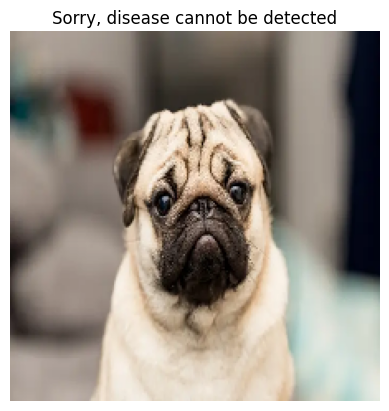

In [ ]:
from google.colab import files

# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# upload image
print("Upload image for prediction:")
uploaded = files.upload()

# process each uploaded image
for file_name in uploaded.keys():
    print(f"File yang diunggah: {file_name}")

    # image prediction with "unknown" detection
    test_image, predicted_class, confidence = predict_image_with_unknown(
        model, file_name, train_data.class_indices, threshold=0.65
    )

    # display image and prediction result
    if predicted_class == "Penyakit tidak dapat kami deteksi":
        plt.imshow(image.load_img(file_name))  # display original image
        plt.title(predicted_class)
    else:
        plt.imshow(test_image)  # display processed image
        plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
    plt.axis("off")
    plt.show()

Upload image for prediction:


Saving images (14).jpg to images (14).jpg
File yang diunggah: images (14).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


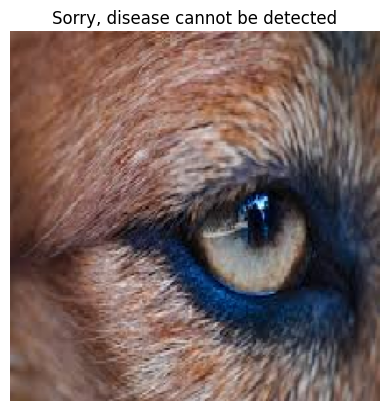

In [ ]:
from google.colab import files

# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# upload image
print("Upload image for prediction:")
uploaded = files.upload()

# process each uploaded image
for file_name in uploaded.keys():
    print(f"File yang diunggah: {file_name}")

    # image prediction with "unknown" detection
    test_image, predicted_class, confidence = predict_image_with_unknown(
        model, file_name, train_data.class_indices, threshold=0.65
    )

    # display image and prediction result
    if predicted_class == "Penyakit tidak dapat kami deteksi":
        plt.imshow(image.load_img(file_name))  # display original image
        plt.title(predicted_class)
    else:
        plt.imshow(test_image)  # display processed image
        plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


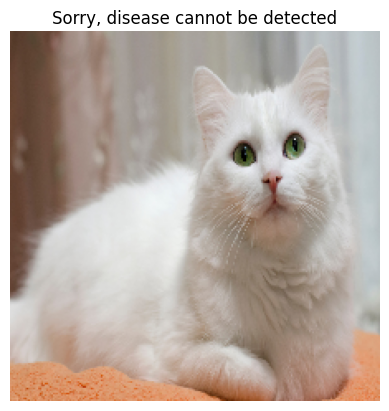

In [ ]:
# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with additional "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.7):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# path of the image that want to be tested
test_image_path = '/content/drive/MyDrive/test gambar/mengenal-fakta-menarik-seputar-kucing-anggora-turki-halodoc.jpg'

# image prediction with "unknown" detection
test_image, predicted_class, confidence = predict_image_with_unknown(
    model, test_image_path, train_data.class_indices, threshold=0.65
)

# display image and prediction result
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


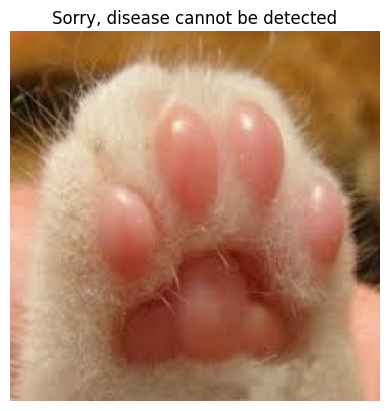

In [ ]:
# function for loading and processing image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

# function to predict images
def predict_image(model, img_path, class_indices):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    class_name = list(class_indices.keys())[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    return img, class_name, confidence

# function to predict images with additional "unknown" detection
def predict_image_with_unknown(model, img_path, class_indices, threshold=0.65):
    img_array, img = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]

    # check if the confidence is below the threshold
    if confidence < threshold:
        class_name = "Sorry, disease cannot be detected"
    else:
        class_name = list(class_indices.keys())[predicted_class_index]

    return img, class_name, confidence

# path of the image that want to be tested
test_image_path = '/content/drive/MyDrive/test gambar/images (7).jpg'

# image prediction with "unknown" detection
test_image, predicted_class, confidence = predict_image_with_unknown(
    model, test_image_path, train_data.class_indices, threshold=0.65
)

# display image and prediction result
plt.imshow(test_image)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}" if predicted_class != "Sorry, disease cannot be detected" else predicted_class)
plt.axis("off")
plt.show()

## **Save and Convert The Model**

In [ ]:
# Save the entire model (architecture + weights) to an H5 file
model.save('/content/drive/MyDrive/Model 3/my_model.h5')

# Save only the model weights to a separate H5 file
model.save_weights('/content/drive/MyDrive/Model 3/my_weight.weights.h5')

In [ ]:
# Save the entire model (architecture + weights) to a Keras format file
model.save('/content/drive/MyDrive/Model 3/my_model.keras')

In [ ]:
# Load the saved Keras model from the specified file
model_load = tf.keras.models.load_model('/content/drive/MyDrive/Model 3/my_model.keras')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_load)
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model to a .tflite file
with open('/content/drive/MyDrive/Model 3/my_model.tflite', 'wb') as f:
    f.write(tflite_model)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 29 variables whereas the saved optimizer has 56 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saved artifact at '/tmp/tmpnhv0j8ix'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  133397848580768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848639088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848641200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848587456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848648064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848651760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848652464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848649472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848648768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848626048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133397848624288